<a href="https://colab.research.google.com/github/Kiana1109/My-First-Project-Python/blob/main/Data%20Science%20Salaries-2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Data Science Salaries_2024.csv")

In [3]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


In [4]:
# Grouping the data by 'job_title' and 'employee_residence', then calculating the average salary What is the average salary for each job title across different countries?
average_salary_by_job_and_country = df.groupby(['job_title', 'employee_residence'])['salary_in_usd'].mean().reset_index()

# Printing the result
print(average_salary_by_job_and_country)

                           job_title employee_residence  salary_in_usd
0                       AI Architect                 BE  215936.000000
1                       AI Architect                 CA  800000.000000
2                       AI Architect                 US  235694.230769
3                       AI Developer                 BA  120000.000000
4                       AI Developer                 CA  275000.000000
..                               ...                ...            ...
610               Staff Data Analyst                 CA   44753.000000
611               Staff Data Analyst                 NG   15000.000000
612               Staff Data Analyst                 SA  179998.000000
613             Staff Data Scientist                 US  134500.000000
614  Staff Machine Learning Engineer                 US  185000.000000

[615 rows x 3 columns]


In [5]:
# Convert 'work_year' column to datetime type  How have salaries for different job titles changed over the years?
df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')

# Group the data by 'work_year' and 'job_title', then calculate the average salary
average_salary_by_year_and_job = df.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().reset_index()

print(average_salary_by_year_and_job)



     work_year                   job_title  salary_in_usd
0   2020-01-01                AI Scientist   45896.000000
1   2020-01-01         Azure Data Engineer  100000.000000
2   2020-01-01             BI Data Analyst   98000.000000
3   2020-01-01           Big Data Engineer   97690.333333
4   2020-01-01       Business Data Analyst  110000.000000
..         ...                         ...            ...
346 2024-01-01            Research Analyst  129744.500000
347 2024-01-01           Research Engineer  211257.692308
348 2024-01-01          Research Scientist  214740.635802
349 2024-01-01           Robotics Engineer  123000.000000
350 2024-01-01  Robotics Software Engineer  196625.000000

[351 rows x 3 columns]


In [6]:
# Group the data by 'employment_type' and calculate the average salary          Are there differences in salaries between full-time and part-time employees?
average_salary_by_employment_type = df.groupby('employment_type')['salary_in_usd'].mean()

# Print the average salary for each employment type
print("Average Salary by Employment Type:")
print(average_salary_by_employment_type)

# Perform a t-test to determine if there is a significant difference in salaries between full-time and part-time employees
full_time_salaries = df[df['employment_type'] == 'FT']['salary_in_usd']
part_time_salaries = df[df['employment_type'] == 'PT']['salary_in_usd']

# Performing t-test
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(full_time_salaries, part_time_salaries)

# Print the t-statistic and p-value
print("\nT-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nThere is a significant difference in salaries between full-time and part-time employees.")
else:
    print("\nThere is no significant difference in salaries between full-time and part-time employees.")

Average Salary by Employment Type:
employment_type
CT    112007.500000
FL     50236.769231
FT    150175.764081
PT     69608.037037
Name: salary_in_usd, dtype: float64

T-statistic: 6.077589173991729
P-value: 1.2499701041831096e-09

There is a significant difference in salaries between full-time and part-time employees.


In [7]:
# Sort the data by salary in descending order    What are the highest-paying job titles within the dataset?
sorted_df = df.sort_values(by='salary_in_usd', ascending=False)

# Get the highest-paying job titles
highest_paying_job_titles = sorted_df['job_title'].unique()

# Print the highest-paying job titles
print("Highest-Paying Job Titles:")
for job_title in highest_paying_job_titles:
    print(job_title)

Highest-Paying Job Titles:
AI Architect
Data Analyst
Analytics Engineer
Machine Learning Engineer
Machine Learning Scientist
Data Engineer
Data Scientist
Research Engineer
Research Scientist
Prompt Engineer
ML Engineer
Head of Machine Learning
Applied Machine Learning Scientist
AI Scientist
Principal Data Scientist
Applied Scientist
Data Analytics Lead
Data Architect
AI Engineer
Analytics Engineering Manager
Data Infrastructure Engineer
Data Science
Applied Data Scientist
Director of Data Science
Machine Learning Software Engineer
Data Science Tech Lead
Computer Vision Engineer
Data Lead
Deep Learning Engineer
Head of Data Science
Head of Data
Data Science Manager
Finance Data Analyst
Data Product Owner
Business Intelligence
Research Analyst
Machine Learning Infrastructure Engineer
Managing Director Data Science
Data Operations Engineer
Robotics Software Engineer
MLOps Engineer
Lead Data Engineer
AI Developer
NLP Engineer
Data Science Lead
Data Science Engineer
Business Intelligence Ma

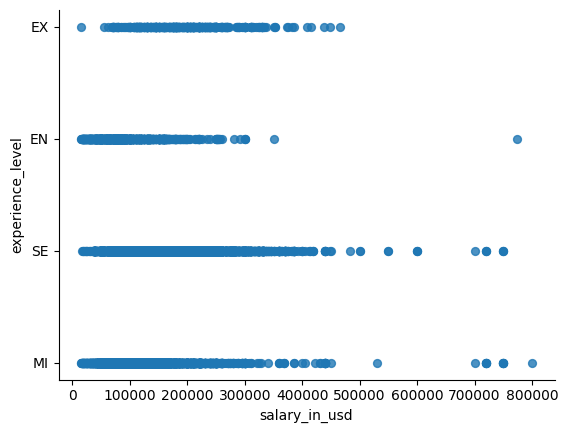

In [10]:
df.plot(kind='scatter', x='salary_in_usd', y='experience_level', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

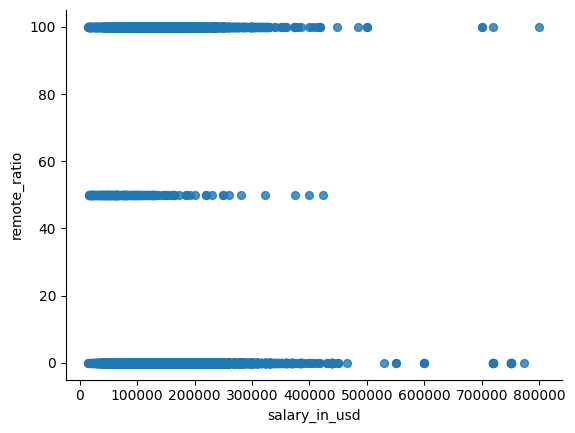

In [11]:
df.plot(kind='scatter', x='salary_in_usd', y='remote_ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

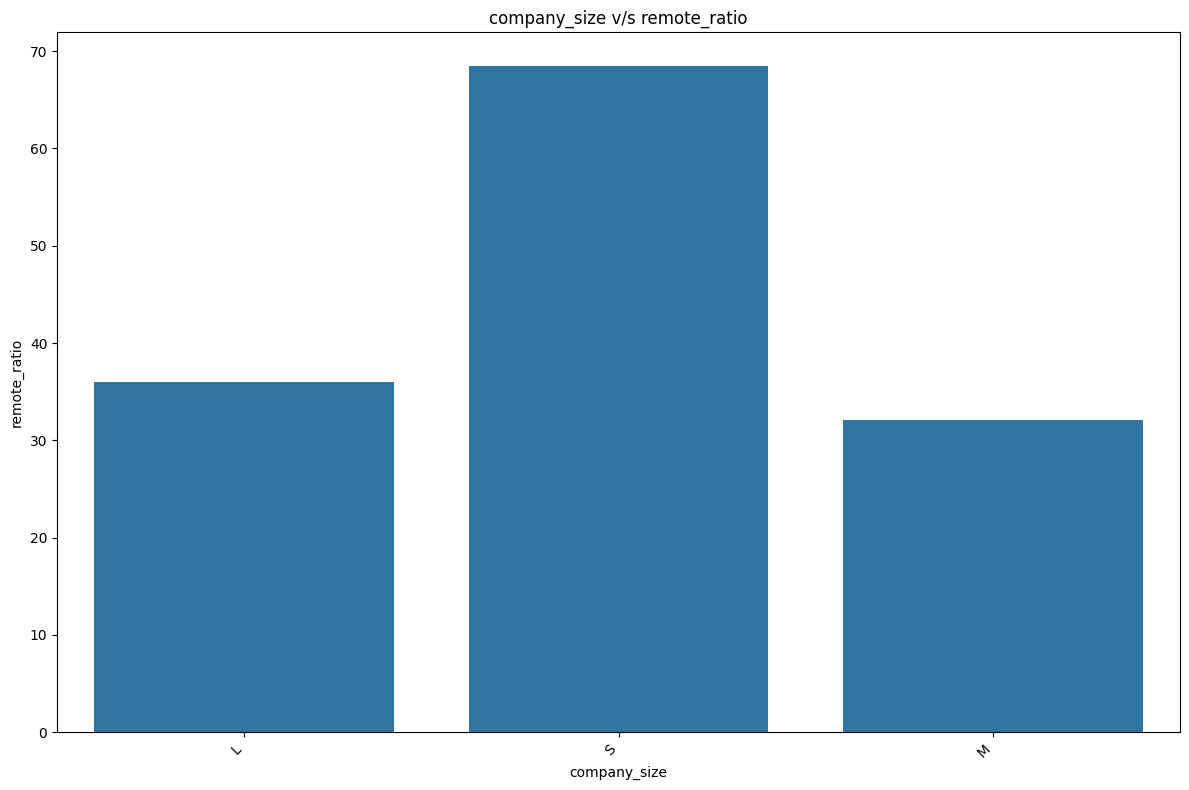

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(x='company_size', y='remote_ratio', data=df, errorbar=None)
plt.title('company_size v/s remote_ratio')
plt.xlabel('company_size')
plt.ylabel('remote_ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
df.shape

(14838, 11)

In [14]:
df.dtypes

work_year             datetime64[ns]
experience_level              object
employment_type               object
job_title                     object
salary                         int64
salary_currency               object
salary_in_usd                  int64
employee_residence            object
remote_ratio                   int64
company_location              object
company_size                  object
dtype: object

In [15]:
df.isna()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
14833,False,False,False,False,False,False,False,False,False,False,False
14834,False,False,False,False,False,False,False,False,False,False,False
14835,False,False,False,False,False,False,False,False,False,False,False
14836,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [17]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

work_year
experience_level
employment_type
job_title
salary_currency
employee_residence
company_location
company_size


In [19]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           14838 non-null  int8 
 1   experience_level    14838 non-null  int8 
 2   employment_type     14838 non-null  int8 
 3   job_title           14838 non-null  int16
 4   salary              14838 non-null  int64
 5   salary_currency     14838 non-null  int8 
 6   salary_in_usd       14838 non-null  int64
 7   employee_residence  14838 non-null  int8 
 8   remote_ratio        14838 non-null  int64
 9   company_location    14838 non-null  int8 
 10  company_size        14838 non-null  int8 
dtypes: int16(1), int64(3), int8(7)
memory usage: 478.3 KB


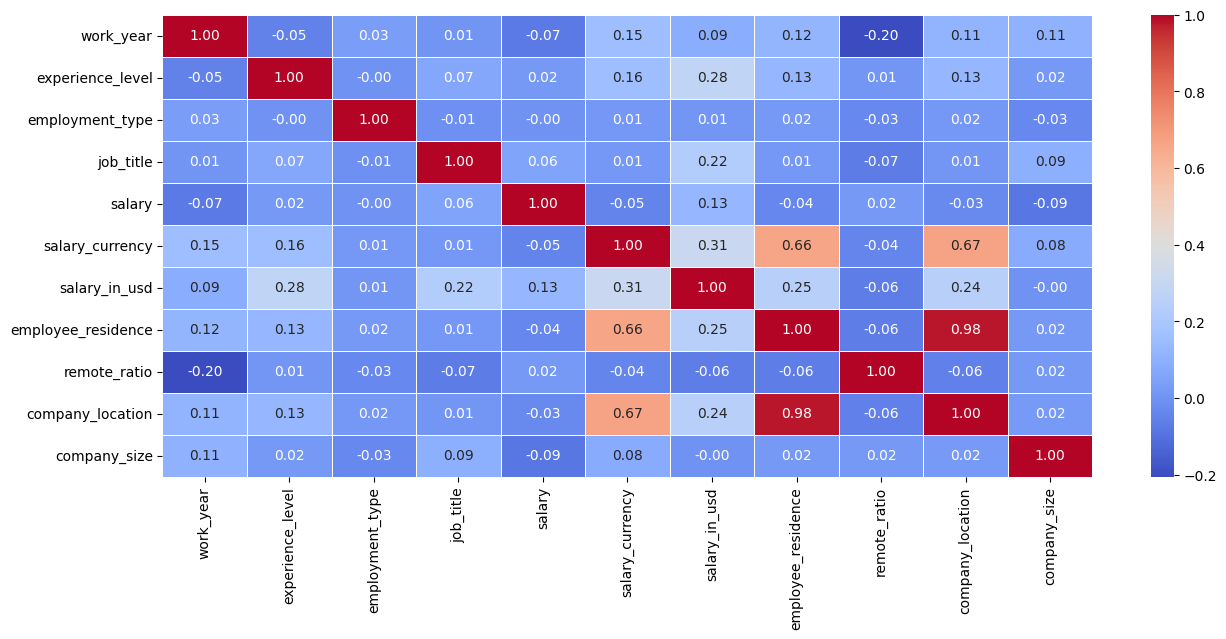

In [21]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="coolwarm");

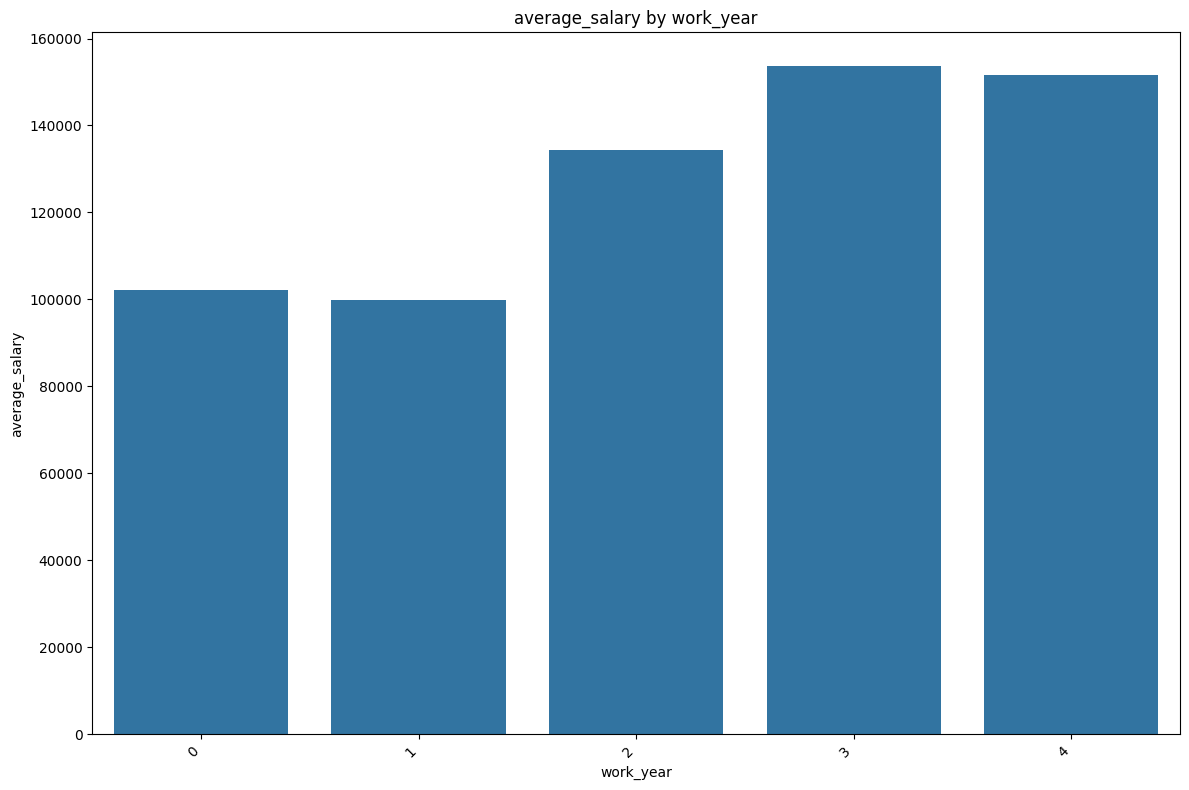

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(x='work_year', y='salary_in_usd', data=df, errorbar=None)
plt.title('average_salary by work_year')
plt.xlabel('work_year')
plt.ylabel('average_salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()